# Introduction
Welcome to this detailed analysis where we explore a dataset focused on breast cancer survival rates. The goal is to provide a comprehensive understanding of the data through descriptive statistics, enhancing our knowledge about key factors influencing survival.



# Objective
Our primary objective is to use descriptive statistics to summarize and understand the data's behavior, which will assist in further analyses like predictive modeling or hypotheses testing.

# Data Description
The dataset comes from a .sav file, commonly used in SPSS software, containing a mix of clinical and demographic variables related to breast cancer patients.



In [1]:
!pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 21.3 MB/s eta 0:00:00


# Load the Dataset
Now, we will load the dataset from the SPSS file and inspect the initial few entries to understand the structure.

In [2]:
# Import necessary libraries
import pandas as pd
import pyreadstat  # To read SPSS files
import numpy as np
from scipy.stats import skew, kurtosis
from scipy import stats
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the data
df, meta = pyreadstat.read_sav('/kaggle/input/breast-cancer-dataset/Breast cancer survival.sav')

# Display the first few rows to understand the data
print(df.head())

# Check metadata for any additional insights into variable labels
print(meta.variable_value_labels)

    id   age  pathsize  lnpos  histgrad   er   pr  status       time
0  1.0  60.0       NaN    0.0       3.0  0.0  0.0     0.0   9.466667
1  2.0  79.0       NaN    0.0       NaN  NaN  NaN     0.0   8.600000
2  3.0  82.0       NaN    0.0       2.0  NaN  NaN     0.0  19.333333
3  4.0  66.0       NaN    0.0       2.0  1.0  1.0     0.0  16.333333
4  5.0  52.0       NaN    0.0       3.0  NaN  NaN     0.0   8.500000
{'histgrad': {4.0: 'Unknown'}, 'er': {0.0: 'Negative', 1.0: 'Positive', 2.0: 'Unknown'}, 'pr': {0.0: 'Negative', 1.0: 'Positive', 2.0: 'Unknown'}, 'status': {0.0: 'Censored', 1.0: 'Died'}}


In [4]:
df.describe()

,id,age,pathsize,lnpos,histgrad,er,pr,status,time
count,1207.000000,1207.000000,1121.000000,1207.000000,920.000000,869.000000,851.000000,1207.000000,1207.000000
mean,621.072080,56.387738,1.733488,0.880696,2.269565,0.611047,0.542891,0.059652,46.956476
std,359.623207,13.327627,0.995857,2.535457,0.607487,0.487793,0.498450,0.236939,29.638977
min,1.000000,22.000000,0.100000,0.000000,1.000000,0.000000,0.000000,0.000000,2.633333
25%,310.500000,46.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,22.550000
50%,619.000000,56.000000,1.500000,0.000000,2.000000,1.000000,1.000000,0.000000,42.966667
75%,931.500000,66.500000,2.200000,0.000000,3.000000,1.000000,1.000000,0.000000,65.583333
max,1266.000000,88.000000,7.000000,35.000000,3.000000,1.000000,1.000000,1.000000,133.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1207 non-null   float64
 1   age       1207 non-null   float64
 2   pathsize  1121 non-null   float64
 3   lnpos     1207 non-null   float64
 4   histgrad  920 non-null    float64
 5   er        869 non-null    float64
 6   pr        851 non-null    float64
 7   status    1207 non-null   float64
 8   time      1207 non-null   float64
dtypes: float64(9)
memory usage: 85.0 KB


**Identifying Categorical Variables**
histgrad
Based on the data inspection, we identified four categorical columns: 'histgrad', 'er', 'pr', and 'status'. These columns contain categorical data that need to be converted into a format suitable for analysis and modeling.

In [6]:
# List of categorical columns
categorical_columns = ['histgrad', 'er', 'pr', 'status']

# Using a for loop to convert columns to string type
for col in categorical_columns:
    df[col] = df[col].astype(str).replace('nan',np.nan)
    
# in the "histgrad" column by converting them from 'nan' (string) to np.nan (actual NaN object). 
# this ensures that these values are treated appropriately in analyses as missing data rather than as a category. 

In [7]:
# Display the updated data types to confirm the changes
print(df.dtypes)

id          float64
age         float64
pathsize    float64
lnpos       float64
histgrad     object
er           object
pr           object
status       object
time        float64
dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1207 non-null   float64
 1   age       1207 non-null   float64
 2   pathsize  1121 non-null   float64
 3   lnpos     1207 non-null   float64
 4   histgrad  920 non-null    object 
 5   er        869 non-null    object 
 6   pr        851 non-null    object 
 7   status    1207 non-null   object 
 8   time      1207 non-null   float64
dtypes: float64(5), object(4)
memory usage: 85.0+ KB


In [9]:
categorical_columns = ['histgrad', 'er', 'pr', 'status']
continuous_columns = ['age', 'pathsize', 'lnpos', 'time']

In [10]:
# Generate frequency tables and find the mode for each categorical column
for col in ['histgrad', 'er', 'pr', 'status']:
    frequency_table = df[col].value_counts()
    mode_value = df[col].mode()[0]
    print(f"Frequency table for {col}:\n{frequency_table}\n")
    print(f"Mode for {col}: {mode_value}\n")
    print('**'*30)

Frequency table for histgrad:
histgrad
2.0    514
3.0    327
1.0     79
Name: count, dtype: int64

Mode for histgrad: 2.0

************************************************************
Frequency table for er:
er
1.0    531
0.0    338
Name: count, dtype: int64

Mode for er: 1.0

************************************************************
Frequency table for pr:
pr
1.0    462
0.0    389
Name: count, dtype: int64

Mode for pr: 1.0

************************************************************
Frequency table for status:
status
0.0    1135
1.0      72
Name: count, dtype: int64

Mode for status: 0.0

************************************************************


In [11]:
df[continuous_columns].describe()

,age,pathsize,lnpos,time
count,1207.000000,1121.000000,1207.000000,1207.000000
mean,56.387738,1.733488,0.880696,46.956476
std,13.327627,0.995857,2.535457,29.638977
min,22.000000,0.100000,0.000000,2.633333
25%,46.000000,1.000000,0.000000,22.550000
50%,56.000000,1.500000,0.000000,42.966667
75%,66.500000,2.200000,0.000000,65.583333
max,88.000000,7.000000,35.000000,133.800000


# Advanced statistical calculations for continuous_columns

In [12]:
variance = df[continuous_columns].var()
skewness = df[continuous_columns].skew()
kurtosis_values = df[continuous_columns].kurt()
Q1 = df[continuous_columns].quantile(0.25)
Q3 = df[continuous_columns].quantile(0.75)
IQR = Q3 - Q1

# Displaying the advanced statistics
print("Variance:\n", variance)
print("**"*30)
print("Skewness:\n", skewness)
print("**"*30)
print("Kurtosis:\n", kurtosis_values)
print("**"*30)
print("Interquartile Range (IQR):\n", IQR)

Variance:
 age         177.625654
pathsize      0.991730
lnpos         6.428541
time        878.468930
dtype: float64
************************************************************
Skewness:
 age         0.049489
pathsize    1.340715
lnpos       5.346459
time        0.630557
dtype: float64
************************************************************
Kurtosis:
 age         -0.765026
pathsize     2.659314
lnpos       43.047260
time        -0.239387
dtype: float64
************************************************************
Interquartile Range (IQR):
 age         20.500000
pathsize     1.200000
lnpos        0.000000
time        43.033333
dtype: float64


In [13]:
# Calculate various advanced statistics
variance = df[continuous_columns].var().rename("Variance")
skewness = df[continuous_columns].skew().rename("Skewness")
kurtosis_values = df[continuous_columns].kurt().rename("Kurtosis")
Q1 = df[continuous_columns].quantile(0.25).rename("Q1")
Q3 = df[continuous_columns].quantile(0.75).rename("Q3")
IQR = (Q3 - Q1).rename("IQR")

# Combine all statistics into a single DataFrame for easy comparison
advanced_stats = pd.concat([variance, skewness, kurtosis_values, Q1, Q3, IQR], axis=1)

# Display the results
advanced_stats

,Variance,Skewness,Kurtosis,Q1,Q3,IQR
age,177.625654,0.049489,-0.765026,46.00,66.500000,20.500000
pathsize,0.991730,1.340715,2.659314,1.00,2.200000,1.200000
lnpos,6.428541,5.346459,43.047260,0.00,0.000000,0.000000
time,878.468930,0.630557,-0.239387,22.55,65.583333,43.033333


In [14]:
# Define the continuous columns
continuous_columns = ['age', 'pathsize', 'lnpos', 'time']

# Initialize a dictionary to hold the results
results = {}

# Loop over each continuous variable to calculate statistics
for col in continuous_columns:
    # Collecting all statistics for the column
    stats = {
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Std': df[col].std(),
        'Variance': df[col].var(),
        'Min': df[col].min(),
        '25%': df[col].quantile(0.25),
        '75%': df[col].quantile(0.75),
        'Max': df[col].max(),
        'Skewness': df[col].skew(),
        'Kurtosis': df[col].kurt()
    }
    results[col] = stats

# Convert the dictionary to a DataFrame
stats_df = pd.DataFrame(results)

# Transpose the DataFrame to get variables as columns and statistics as rows
stats_df = stats_df.T

# Print the resulting DataFrame
stats_df

,Mean,Median,Std,Variance,Min,25%,75%,Max,Skewness,Kurtosis
age,56.387738,56.000000,13.327627,177.625654,22.000000,46.00,66.500000,88.0,0.049489,-0.765026
pathsize,1.733488,1.500000,0.995857,0.991730,0.100000,1.00,2.200000,7.0,1.340715,2.659314
lnpos,0.880696,0.000000,2.535457,6.428541,0.000000,0.00,0.000000,35.0,5.346459,43.047260
time,46.956476,42.966667,29.638977,878.468930,2.633333,22.55,65.583333,133.8,0.630557,-0.239387


# Distribution Analysis of Continuous Variables

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

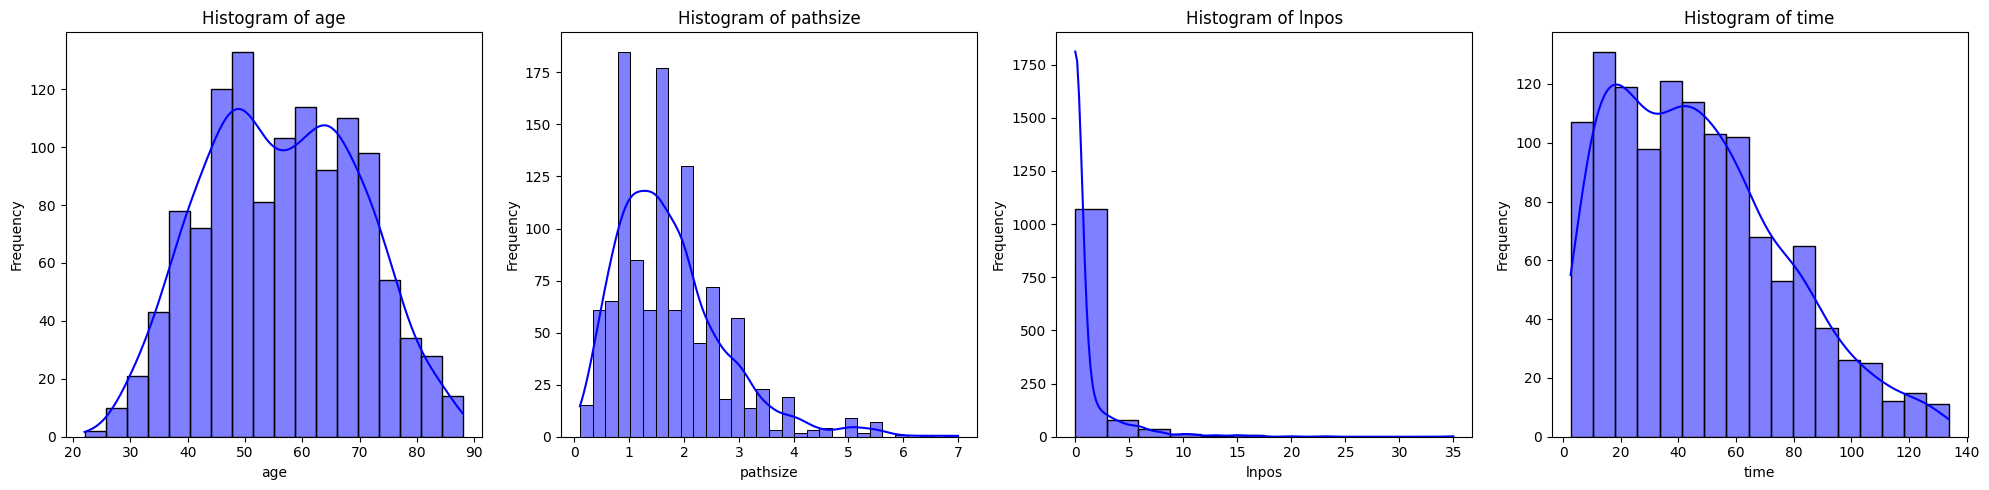

In [15]:
# Prepare to plot histograms for continuous variables
plt.figure(figsize=(20, 5))  # Adjust figure size for clarity

# Create a histogram for each continuous variable
for i, col in enumerate(continuous_columns):
    plt.subplot(1, len(continuous_columns), i+1)  # Arrange subplots in a single row
    sns.histplot(df[col], kde=True, color="blue")  # Adding KDE to smooth histogram
    plt.title(f'Histogram of {col}')  # Title for each histogram
    plt.xlabel(col)  # x-axis label
    plt.ylabel('Frequency')  # y-axis label

# Display the histograms
plt.tight_layout()  # Ensure there is no overlap of plots
plt.show()

# Discretization of the 'lnpos' Variable

In [16]:

# Check the unique values
unique_values = df['lnpos'].unique()

if len(unique_values) > 1:
    # Define the bins by directly dividing the range into two
    min_value = df['lnpos'].min()
    max_value = df['lnpos'].max()
    median_value = df['lnpos'].median()

    # Adjust bin edges if necessary to ensure they are unique
    bins = [min_value - 0.1, median_value, max_value]

    # Use pd.cut to discretize 'lnpos'
    df['lnpos_YN'] = pd.cut(df['lnpos'], bins=bins, labels=['No', 'Yes'], include_lowest=True)

# If only one unique value, handle separately
else:
    df['lnpos_YN'] = 'Yes'  # or 'No', depending on your analysis needs

# Verify the discretization by checking the first few rows
print(df[['lnpos', 'lnpos_YN']].head())
print(df[['lnpos', 'lnpos_YN']].tail())

   lnpos lnpos_YN
0    0.0       No
1    0.0       No
2    0.0       No
3    0.0       No
4    0.0       No
      lnpos lnpos_YN
1202    5.0      Yes
1203    0.0       No
1204    7.0      Yes
1205   11.0      Yes
1206    0.0       No


In [17]:
# Calculate the frequency table for 'lnpos_YN'
lnpos_YN_frequency = df['lnpos_YN'].value_counts()
lnpos_YN_frequency

lnpos_YN
No     929
Yes    278
Name: count, dtype: int64

# Discretization of the 'pathsize' Variable

In [18]:
# Define the bins and labels according to your specification
bins = [-float('inf'), 2, 5, float('inf')]  # Extending bins to negative infinity
labels = ['<2', '2 <= pathsize <= 5', '>5']

# Use pd.cut to discretize 'pathsize'
df['pathsize_category'] = pd.cut(df['pathsize'], bins=bins, labels=labels, include_lowest=True)

# Verify the discretization by checking the first few rows
print(df[['pathsize', 'pathsize_category']].head())
print(df[['pathsize', 'pathsize_category']].tail())

   pathsize pathsize_category
0       NaN               NaN
1       NaN               NaN
2       NaN               NaN
3       NaN               NaN
4       NaN               NaN
      pathsize pathsize_category
1202       5.5                >5
1203       6.0                >5
1204       6.5                >5
1205       5.5                >5
1206       7.0                >5


In [19]:
# Calculate the frequency table for 'pathsize_category'
pathsize_category_frequency = df['pathsize_category'].value_counts()
pathsize_category_frequency

pathsize_category
<2                    826
2 <= pathsize <= 5    283
>5                     12
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 1207 non-null   float64 
 1   age                1207 non-null   float64 
 2   pathsize           1121 non-null   float64 
 3   lnpos              1207 non-null   float64 
 4   histgrad           920 non-null    object  
 5   er                 869 non-null    object  
 6   pr                 851 non-null    object  
 7   status             1207 non-null   object  
 8   time               1207 non-null   float64 
 9   lnpos_YN           1207 non-null   category
 10  pathsize_category  1121 non-null   category
dtypes: category(2), float64(5), object(4)
memory usage: 87.6+ KB


# "Can involved lymph nodes (lnpos_YN) and (pathsize_category) affect their status?"

**Analyzing the Impact of 'lnpos_YN' and 'pathsize_category' Involvement on Patient Status Through Cross-Tabulation**

In [21]:
# Create a cross-tabulation of the 'lnpos_YN' and 'status' columns
cross_tab = pd.crosstab(df['lnpos_YN'], df['status'] , normalize='index')
cross_tab

status,0.0,1.0
lnpos_YN,,
No,0.954790,0.045210
Yes,0.892086,0.107914


In [22]:
cross_tab = pd.crosstab(df['pathsize_category'], df['status'], normalize='index')
cross_tab

status,0.0,1.0
pathsize_category,,
<2,0.962470,0.037530
2 <= pathsize <= 5,0.883392,0.116608
>5,0.833333,0.166667


# Comparing some categorical and continuous variables using Pivot table

In [23]:
# Create a pivot table that calculates the mean of 'time' for each category in 'pathsize_category'
pivot_table = df.pivot_table(values='time', index='pathsize_category', aggfunc='mean')
#index => categorical
#value => continous 
# Print the pivot table
pivot_table

/tmp/ipykernel_19/515169679.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='time', index='pathsize_category', aggfunc='mean')


,time
pathsize_category,
<2,47.652542
2 <= pathsize <= 5,43.195995
>5,34.347222


In [24]:
# Create a pivot table that calculates the mean of 'time' and 'age' for each category in 'lnpos_YN'
pivot_table = df.pivot_table(values=['time','age'], index='lnpos_YN', aggfunc={'time':['mean','std'],
                                                                              'age': ['min','max']})

# Print the pivot table
pivot_table

/tmp/ipykernel_19/1864406513.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values=['time','age'], index='lnpos_YN', aggfunc={'time':['mean','std'],


age             time           
           max   min       mean        std
lnpos_YN                                  
No        88.0  22.0  47.385181  29.378292
Yes       82.0  24.0  45.523861  30.504200

In [25]:
# Create a pivot table that calculates the mean of 'time' for each category in 'pathsize_category' and 'lnpos_YN'
pivot_table = df.pivot_table(values='time', index=['pathsize_category','lnpos_YN'], aggfunc=['mean','std'])

# Print the pivot table
pivot_table

/tmp/ipykernel_19/1437472375.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='time', index=['pathsize_category','lnpos_YN'], aggfunc=['mean','std'])
/tmp/ipykernel_19/1437472375.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='time', index=['pathsize_category','lnpos_YN'], aggfunc=['mean','std'])


mean        std
                                  time       time
pathsize_category  lnpos_YN                      
<2                 No        47.057558  28.835447
                   Yes       50.129167  31.580492
2 <= pathsize <= 5 No        46.315263  29.784837
                   Yes       36.823297  26.825617
>5                 No        31.808333  16.465663
                   Yes       35.616667  22.173851

# Visualization Section

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


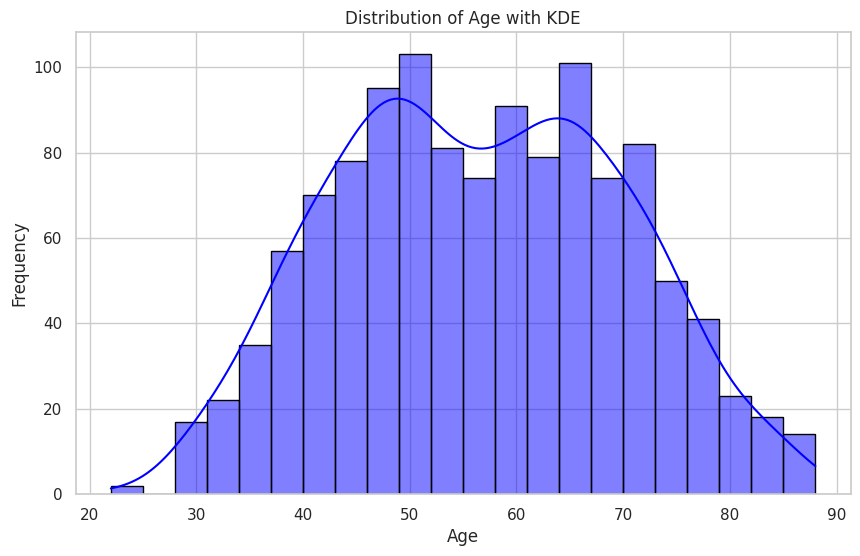

In [26]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a histogram combined with a kernel density estimate
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color="blue",edgecolor="black", binwidth=3, binrange=(df['age'].min(), df['age'].max()))

# Adding more details to the plot
plt.title('Distribution of Age with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()


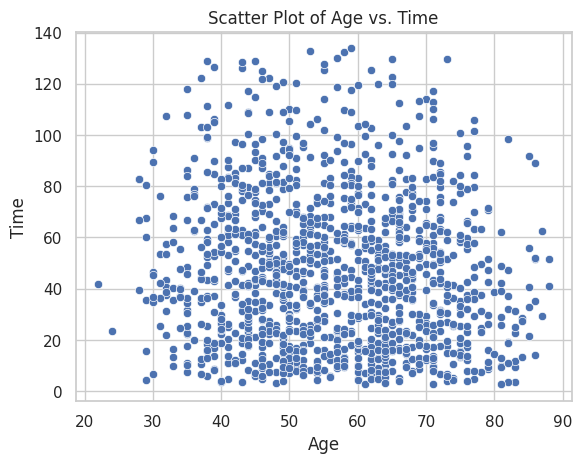

In [27]:

# Create a scatter plot for 'age' and 'time'
sns.scatterplot(x='age', y='time', data=df)
plt.title('Scatter Plot of Age vs. Time')
plt.xlabel('Age')
plt.ylabel('Time')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


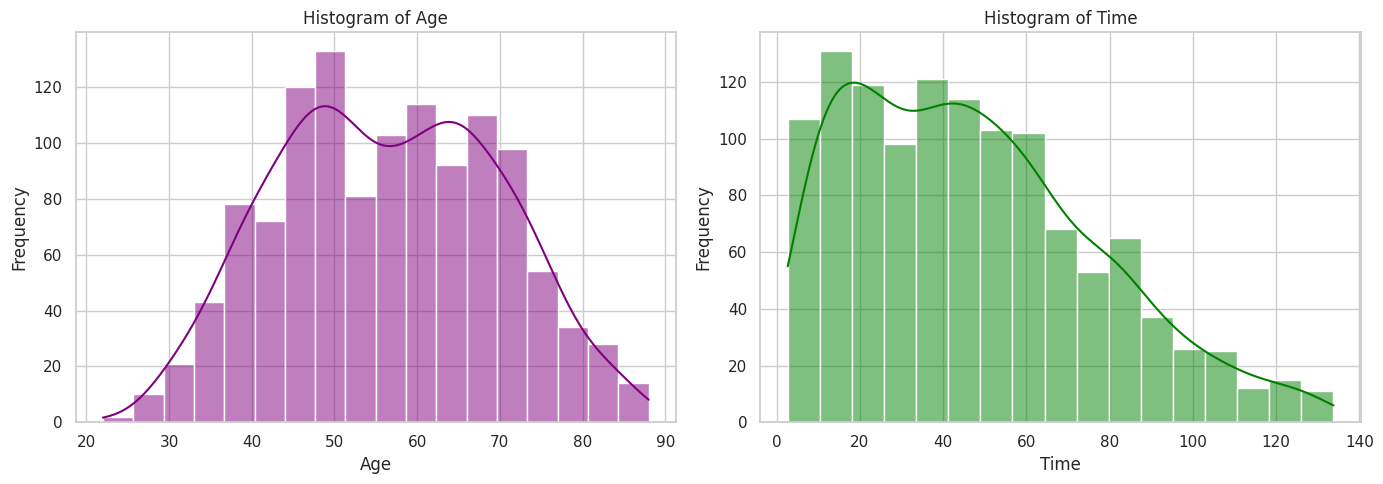

In [28]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for 'age'
sns.histplot(df['age'], kde=True, color="purple", ax=axes[0])
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Histogram for 'time'
sns.histplot(df['time'], kde=True, color="green", ax=axes[1])
axes[1].set_title('Histogram of Time')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


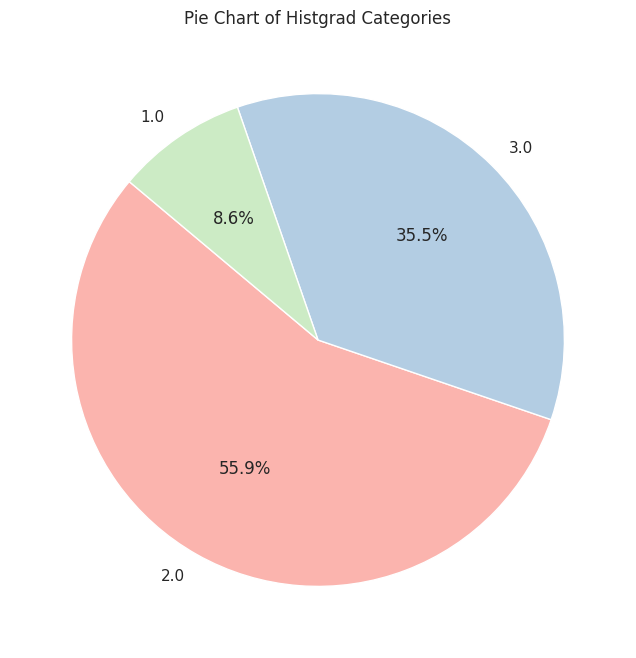

In [29]:
# Count the occurrences of each category in 'histgrad'
histgrad_counts = df['histgrad'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(histgrad_counts, labels=histgrad_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Pie Chart of Histgrad Categories')
plt.show()
